<a href="https://colab.research.google.com/github/beotavalo/agents-genai/blob/main/Graph_DB_demo_ggcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The GGCD Attendee Graph

The GGCD attendee graph collects data from GGCD event attendees about what programming languages and tools they use, what graph use cases they're interested in, and more.

The graph is a Neo4j database running on Neo4j Aura and can be accessed here, using the ready-only username and password: `events`

![](https://github.com/johnymontana/ggcd-samples/blob/master/img/datamodel.png?raw=1)

## Querying Neo4j from Python


We can use the [neo4j python driver](https://github.com/neo4j/neo4j-python-driver) for interacting with Neo4j using Python. It supports Cypher, the bolt protocol, and works nicely with many Python data science libraries.

In [1]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 7.9 MB/s eta 0:00:00


In [6]:
from neo4j import GraphDatabase

# Replace with your actual Neo4j Aura connection details
uri = "neo4j+s://88f0bc82.databases.neo4j.io"
username = "events"
password = "events"

# Create connection to Neo4j instance with encryption
driver = GraphDatabase.driver(uri, auth=(username, password), encrypted=True)

with driver.session() as session:
    result = session.run("MATCH (a) RETURN COUNT(a)")
    for r in result:
        print(r)

ConfigurationError: The config settings "encrypted", "trust", "trusted_certificates", and "ssl_context" can only be used with the URI schemes ['bolt', 'neo4j']. Use the other URI schemes ['bolt+ssc', 'bolt+s', 'neo4j+ssc', 'neo4j+s'] for setting encryption settings.

In [7]:
from neo4j import GraphDatabase

# Replace with your actual Neo4j Aura connection details
uri = "neo4j+s://88f0bc82.databases.neo4j.io"
username = "events"
password = "events"

# Create connection to Neo4j instance, remove encrypted=True since it is implicit in neo4j+s
driver = GraphDatabase.driver(uri, auth=(username, password))

with driver.session() as session:
    result = session.run("MATCH (a) RETURN COUNT(a)")
    for r in result:
        print(r)

ValueError: Cannot resolve address 88f0bc82.databases.neo4j.io:7687

In [2]:
from neo4j import GraphDatabase

In [3]:
# create connection to Neo4j instance
driver = GraphDatabase.driver("bolt+routing://88f0bc82.databases.neo4j.io", auth=("events", "events"), encrypted=True)

ConfigurationError: Uri scheme 'bolt+routing' has been renamed. Use 'neo4j'

In [4]:
# create connection to Neo4j instance
# The URI scheme 'bolt+routing' has been replaced with 'neo4j'
driver = GraphDatabase.driver("neo4j://88f0bc82.databases.neo4j.io", auth=("events", "events"), encrypted=True)

In [8]:
with driver.session() as session:
    result = session.run("MATCH (a) RETURN COUNT(a)")
    for r in result:
        print(r)

ValueError: Cannot resolve address 88f0bc82.databases.neo4j.io:7687

## Pandas

We can use the popular [pandas](http://pandas.pydata.org/) with Neo4j. To create a DataFrame object from data from Neo4j simply pass the result object of a Cypher query into the DataFrame constructor.

In [9]:
# pip install pandas
from pandas import DataFrame

In [10]:
with driver.session() as session:
    result = session.run("MATCH (p:Person)-[:INTERESTED_IN]-(u:Usecase) WITH u.name AS usecase, COUNT(*) AS num RETURN usecase, num")
    df = DataFrame(result.data())
df

ValueError: Cannot resolve address 88f0bc82.databases.neo4j.io:7687

## Plotting



In [ ]:
%matplotlib inline

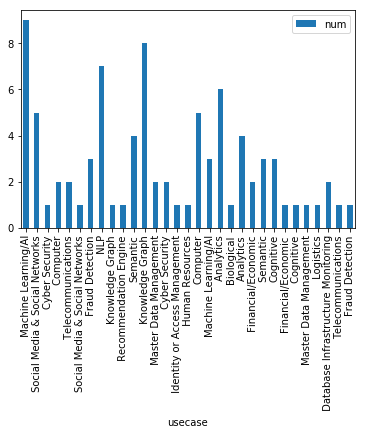

In [ ]:
df.plot.bar(x="usecase")

## NLP

We have review text ("comments") for each review. We can apply NLP techniques such as keyword extraction and sentiment analysis to enhance our data model. We will use the [Textblob Python toolkit](https://textblob.readthedocs.io/en/dev/)

In [ ]:
# !pip install textblob
from textblob import TextBlob

In [ ]:
# fetch one review

with driver.session() as session:
    result = session.run("MATCH (e:Event) RETURN e.description AS desc LIMIT 1")
    description = result.data()
description

[{'desc': 'We will first use the neo4j sandbox to show   interesting db samples. All the attendees will be able to connect and play with the sandbox. We will then show a benchmark to compare graph dbs vs other models for particular data management use cases.'}]

In [ ]:
# instantiate TextBlob object
blob = TextBlob(description[0]['desc'])

# sentiment analysis
print ("Sentiment: ")
print(blob.sentiment.polarity)
print()

# keyword extraction (using noun phrases)
print ("Keywords: ")
print(blob.noun_phrases)

Sentiment: 
0.25833333333333336

Keywords: 
['neo4j sandbox', 'interesting db samples', 'graph dbs vs', 'particular data management use cases']
